<a href="https://colab.research.google.com/github/sanepike/LGMVIP-DataScience-3/blob/main/Stock_Market_Prediction_and_Forecasting_using_stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction and Forecasting using stacked LSTM

## Dataset

There are multiple variables in the dataset – date, open, high, low, last, close, total_trade_quantity, and turnover.

The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
High, Low and Last represent the maximum, minimum, and last price of the share for the day.
Total Trade Quantity is the number of shares bought or sold in the day and Turnover (Lacs) is the turnover of the particular company on a given date.

##Code

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import math
from sklearn.metrics import mean_squared_error

### Importing Dataset

In [ ]:
data = pd.read_csv("/content/NSE-TATAGLOBAL.csv")

### Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
data.sample(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1127,2014-03-05,141.45,142.25,139.45,140.85,140.90,2317544,3259.93
1633,2012-02-27,119.00,120.20,112.00,113.10,113.05,1524588,1756.34
1519,2012-08-07,129.00,130.90,128.15,129.55,129.85,1648078,2138.52
226,2017-11-01,226.95,231.40,226.35,228.00,227.80,3608627,8238.83
512,2016-09-06,141.90,143.25,141.25,141.70,141.75,1300643,1852.52


In [ ]:
## checking for null values
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
data["Open"].describe()

count    2035.000000
mean      149.713735
std        48.664509
min        81.100000
25%       120.025000
50%       141.500000
75%       157.175000
max       327.700000
Name: Open, dtype: float64

In [ ]:
data["High"].describe()

count    2035.000000
mean      151.992826
std        49.413109
min        82.800000
25%       122.100000
50%       143.400000
75%       159.400000
max       328.750000
Name: High, dtype: float64

In [ ]:
data["Low"].describe()

count    2035.000000
mean      147.293931
std        47.931958
min        80.000000
25%       118.300000
50%       139.600000
75%       155.150000
max       321.650000
Name: Low, dtype: float64

In [ ]:
data["Close"].describe()

count    2035.00000
mean      149.45027
std        48.71204
min        80.95000
25%       120.05000
50%       141.25000
75%       156.90000
max       325.75000
Name: Close, dtype: float64

In [ ]:
data["Total Trade Quantity"].describe()

count    2.035000e+03
mean     2.335681e+06
std      2.091778e+06
min      3.961000e+04
25%      1.146444e+06
50%      1.783456e+06
75%      2.813594e+06
max      2.919102e+07
Name: Total Trade Quantity, dtype: float64

In [ ]:
data["Turnover (Lacs)"].describe()

count     2035.000000
mean      3899.980565
std       4570.767877
min         37.040000
25%       1427.460000
50%       2512.030000
75%       4539.015000
max      55755.080000
Name: Turnover (Lacs), dtype: float64

### Plotting using Seaborn

<Axes: xlabel='Open', ylabel='Count'>

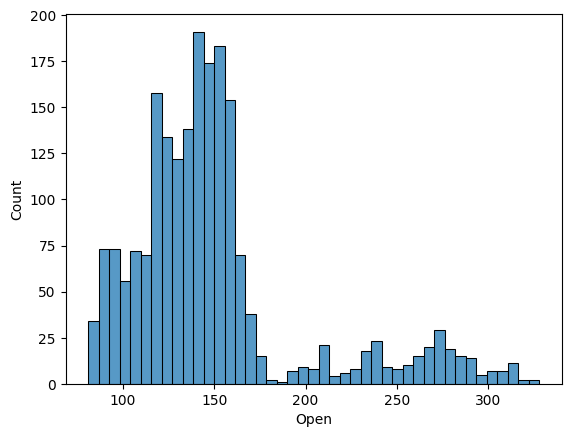

In [ ]:
sns.histplot(data = data, x = data["Open"])

<Axes: xlabel='Open'>

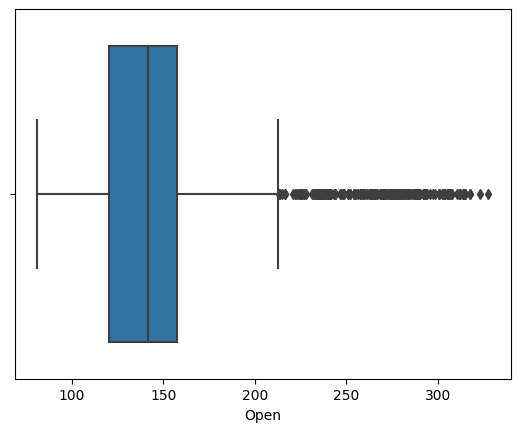

In [ ]:
sns.boxplot(data = data, x = data["Open"])

<Axes: xlabel='High', ylabel='Count'>

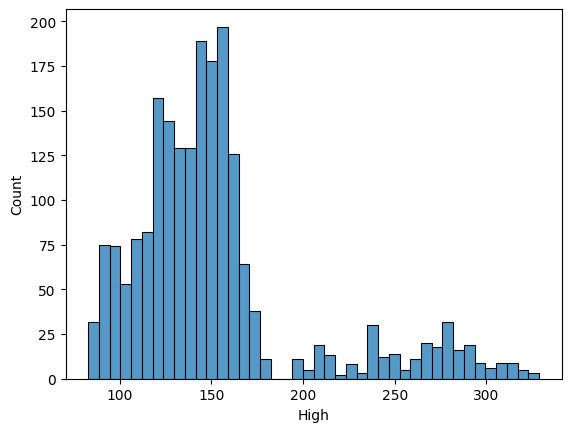

In [ ]:
sns.histplot(data = data, x = data["High"])

<Axes: xlabel='High'>

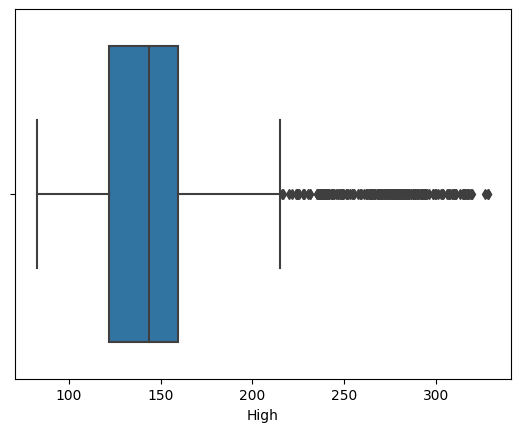

In [ ]:
sns.boxplot(data = data, x = data["High"])

<Axes: xlabel='Low', ylabel='Count'>

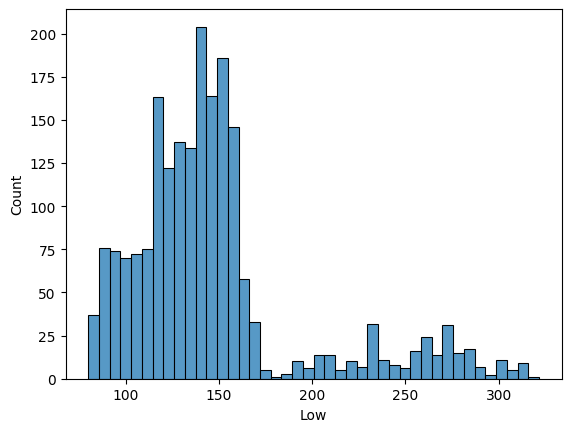

In [ ]:
sns.histplot(data = data, x = data["Low"])

<Axes: xlabel='Low'>

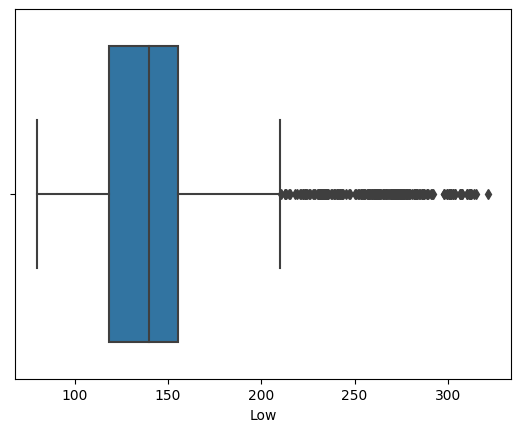

In [ ]:
sns.boxplot(data = data, x = data["Low"])

<Axes: xlabel='Close', ylabel='Count'>

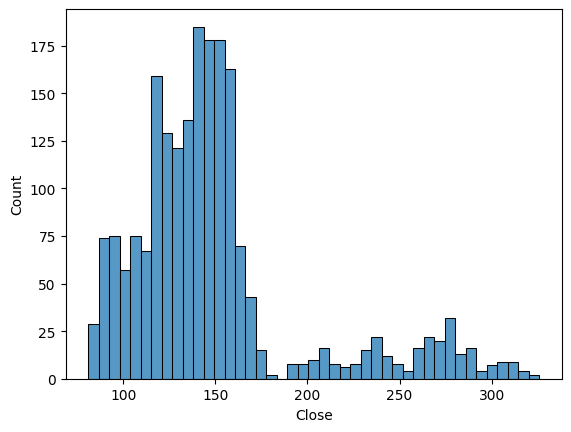

In [ ]:
sns.histplot(data = data, x = data["Close"])

<Axes: xlabel='Close'>

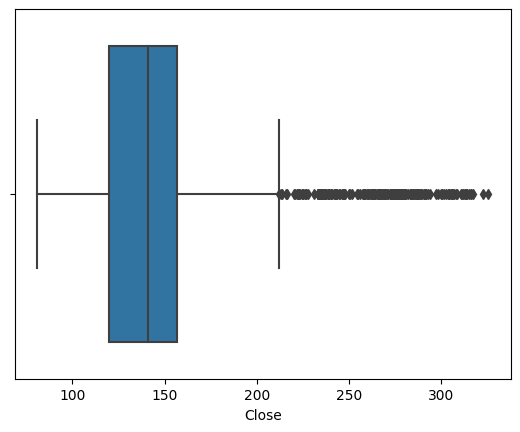

In [ ]:
sns.boxplot(data = data, x = data["Close"])

<Axes: xlabel='Total Trade Quantity', ylabel='Count'>

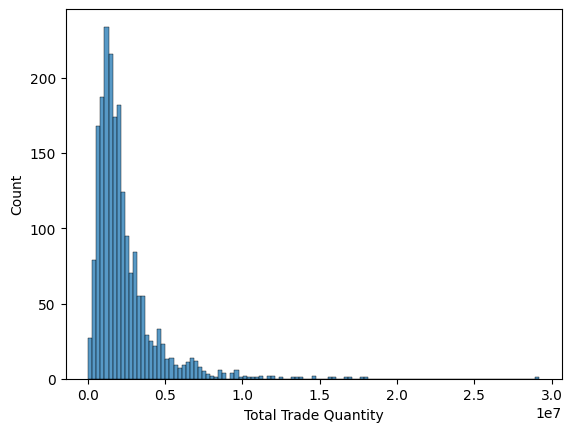

In [ ]:
sns.histplot(data = data, x = data["Total Trade Quantity"])

<Axes: xlabel='Total Trade Quantity'>

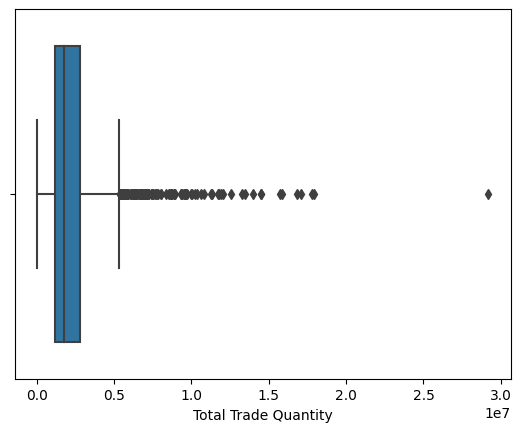

In [ ]:
sns.boxplot(data = data, x = data["Total Trade Quantity"])

<Axes: xlabel='Turnover (Lacs)', ylabel='Count'>

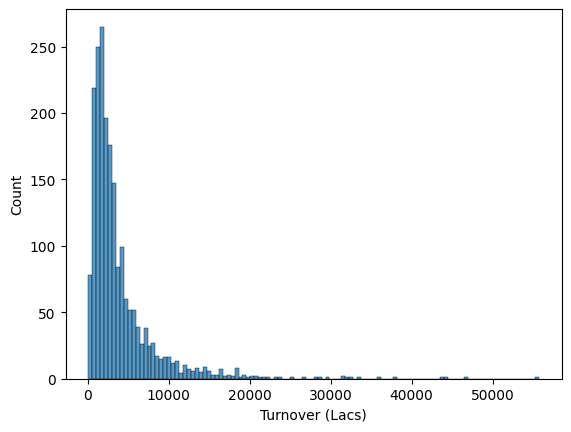

In [ ]:
sns.histplot(data = data, x = data["Turnover (Lacs)"])

<Axes: xlabel='Turnover (Lacs)'>

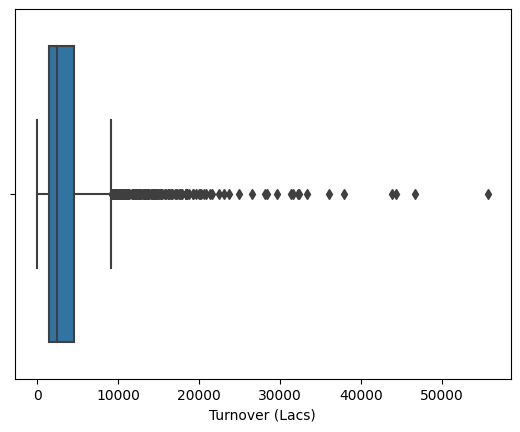

In [ ]:
sns.boxplot(data = data, x = data["Turnover (Lacs)"])

<Axes: xlabel='Date', ylabel='Turnover (Lacs)'>

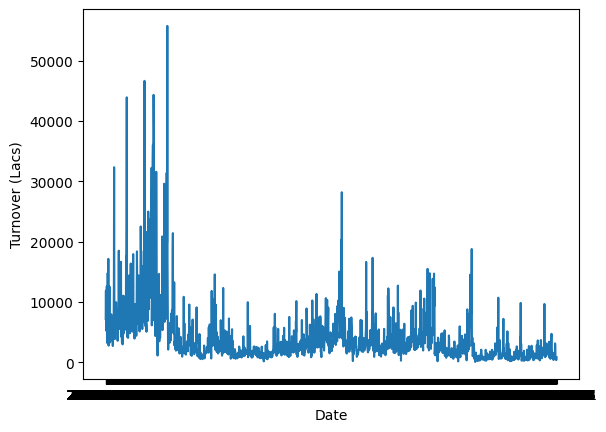

In [ ]:
sns.lineplot(data = data,x = data["Date"], y = data["Turnover (Lacs)"])

<Axes: xlabel='Date', ylabel='Open'>

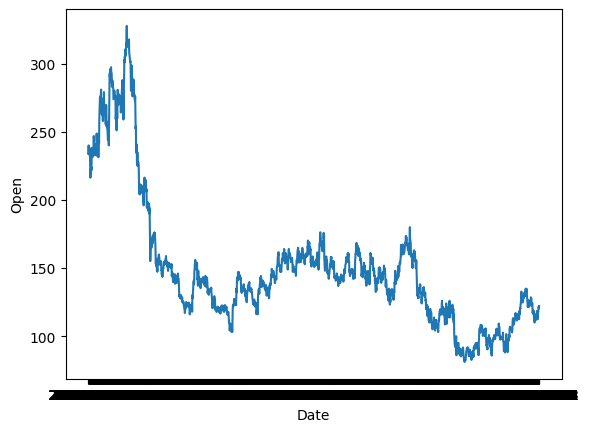

In [ ]:
sns.lineplot(data = data,x = data["Date"], y = data["Open"])

<Axes: xlabel='Date', ylabel='Close'>

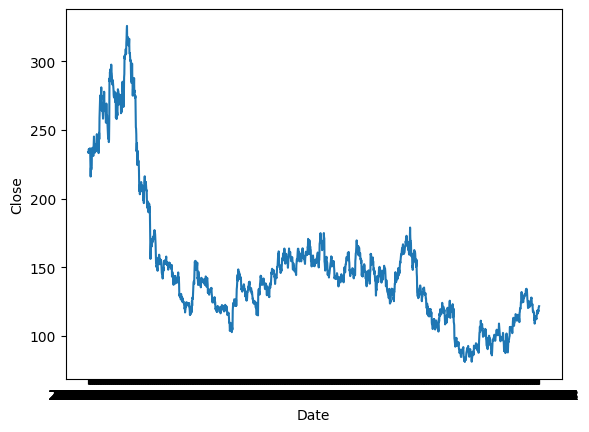

In [ ]:
sns.lineplot(data = data,x = data["Date"], y = data["Close"])

<Axes: xlabel='Date', ylabel='High'>

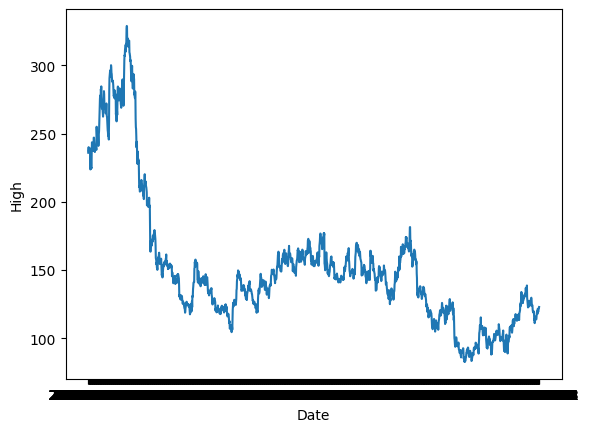

In [ ]:
sns.lineplot(data = data,x = data["Date"], y = data["High"])

<Axes: xlabel='Date', ylabel='Low'>

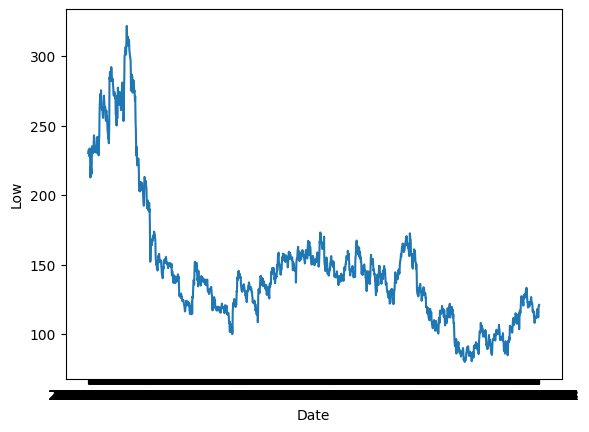

In [ ]:
sns.lineplot(data = data,x = data["Date"], y = data["Low"])

### Preprocessing Dataset

In [ ]:
closeData=data.reset_index()['Close']

<Axes: ylabel='Close'>

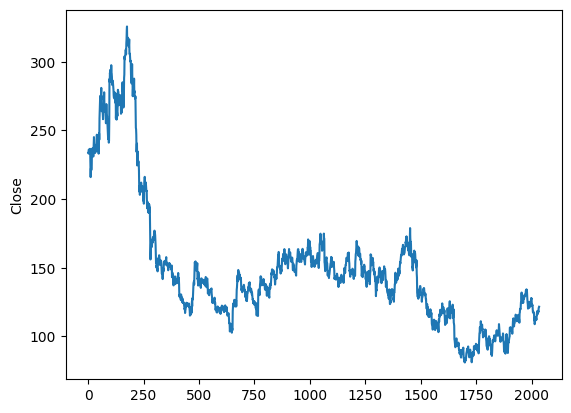

In [ ]:
sns.lineplot(closeData)

In [ ]:
## MinMax Scaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
closeData=scaler.fit_transform(np.array(closeData).reshape(-1,1))

In [ ]:
print(closeData)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


### Test Training Data

In [ ]:
training_size=int(len(closeData)*0.75)
testing_size=len(closeData)-training_size
train_data,test_data=closeData[0:training_size,:],closeData[training_size:len(closeData),:1]

In [ ]:
training_size, testing_size

(1526, 509)

In [ ]:
def create_data(data, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        train_X.append(a)
        train_Y.append(data[i + time_step, 0])
    return np.array(train_X), np.array(train_Y)

In [ ]:
time_step = 100
X_train, y_train = create_data(train_data, time_step)
X_test, y_test = create_data(test_data, time_step)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### LSTM Model

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 13s 275ms/step - loss: 0.0222 - val_loss: 0.0076
Epoch 2/100
23/23 [==============================] - 8s 344ms/step - loss: 0.0025 - val_loss: 6.4414e-04
Epoch 3/100
23/23 [==============================] - 5s 216ms/step - loss: 0.0014 - val_loss: 9.9296e-04
Epoch 4/100
23/23 [==============================] - 6s 276ms/step - loss: 0.0013 - val_loss: 9.6714e-04
Epoch 5/100
23/23 [==============================] - 5s 220ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/100
23/23 [==============================] - 6s 265ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/100
23/23 [==============================] - 5s 219ms/step - loss: 0.0011 - val_loss: 8.1214e-04
Epoch 8/100
23/23 [==============================] - 5s 207ms/step - loss: 0.0010 - val_loss: 8.5087e-04
Epoch 9/100
23/23 [==============================] - 6s 268ms/step - loss: 9.9071e-04 - val_loss: 0.0012
Epoch 10/100
23/23 [==============================] - 5s 208ms/ste

In [ ]:
trainPredict=model.predict(X_train)
testPredict=model.predict(X_test)
trainPredict=scaler.inverse_transform(trainPredict)
testPredict=scaler.inverse_transform(testPredict)

13/13 [==============================] - 1s 40ms/step


In [ ]:
math.sqrt(mean_squared_error(y_train,trainPredict))

161.84675821466288

In [ ]:
math.sqrt(mean_squared_error(y_test,testPredict))

105.49260038285253